In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## Atrributes Information

age<br>
sex(1 = male; 0 = female)<br>
cp:chest pain type (4 values)<br>
trestbps:resting blood pressure (in mm Hg on admission to the hospital)<br>
chol:serum cholestoral in mg/dl<br>
fbs:fasting blood sugar > 120 mg/dl(1 = true; 0 = false)<br>
restecg:resting electrocardiographic results (values 0,1,2)<br>
thalach:maximum heart rate achieved<br>
exang:exercise induced angina(1 = yes; 0 = no)<br>
oldpeak = ST depression induced by exercise relative to rest<br>
slope:the slope of the peak exercise ST segment<br>
ca:number of major vessels (0-3) colored by flourosopy<br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
target - have disease or not (1=yes, 0=no)



### Types of chest pain(cp)
Value 0: typical angina<br>
Value 1: atypical angina<br>
Value 2: non-anginal pain<br>
Value 3: asymptomatic<br>

### Types of restecg
restecg: resting electrocardiographic results<br>
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>

### Types of slope
0: upsloping<br>
1: flat<br>
2: downsloping<br>


**Name of columns**

In [3]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

### Looking for correlation

In [8]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

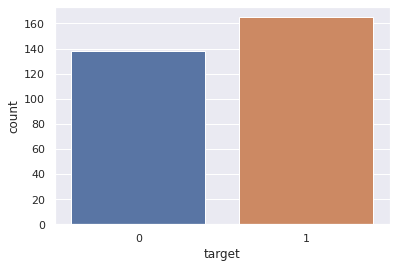

In [9]:
sns.countplot(data=df,x='target');

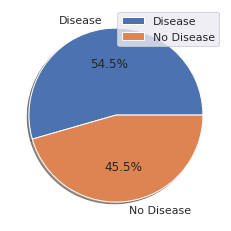

In [10]:
plt.pie(x=df.target.value_counts(),labels=['Disease','No Disease'],autopct='%1.1f%%',shadow=True);
plt.legend(loc='best');

from the above plot we can say there are 54.5% patients in the dataset having heart disease

**Now lets see in Target column,How many Male Females are suffering from heart Diesease**

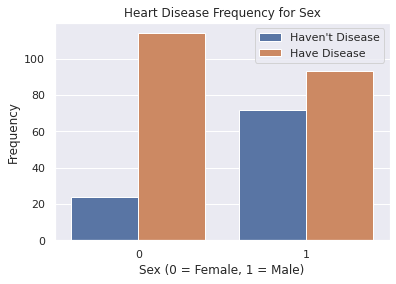

In [11]:
sns.countplot(data=df,x='target',hue='sex');
plt.title('Heart Disease Frequency for Sex');
plt.xlabel('Sex (0 = Female, 1 = Male)');
plt.xticks(rotation=0);
plt.legend(["Haven't Disease", "Have Disease"]);
plt.ylabel('Frequency');

Clearly we can see in both the cases(Disease and No Disease) Males are dominating

**Handling Missing**

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Therefore there is no Missing Values in the dataset

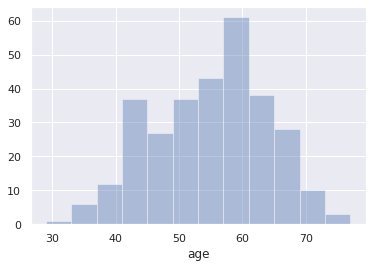

In [13]:
sns.distplot(df.age,kde=False);

In [14]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Therefore there are more patients in age group between 55-60.

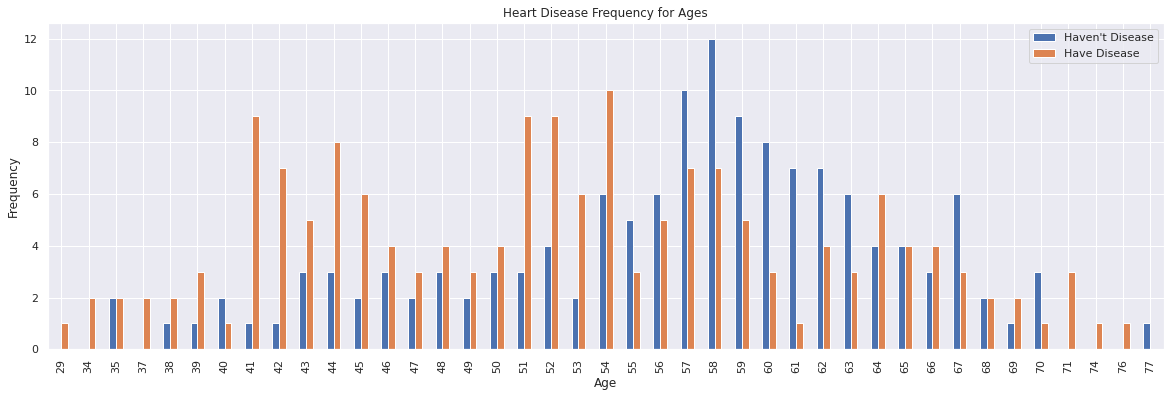

In [15]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6));
plt.title('Heart Disease Frequency for Ages');
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.legend(["Haven't Disease", "Have Disease"]);

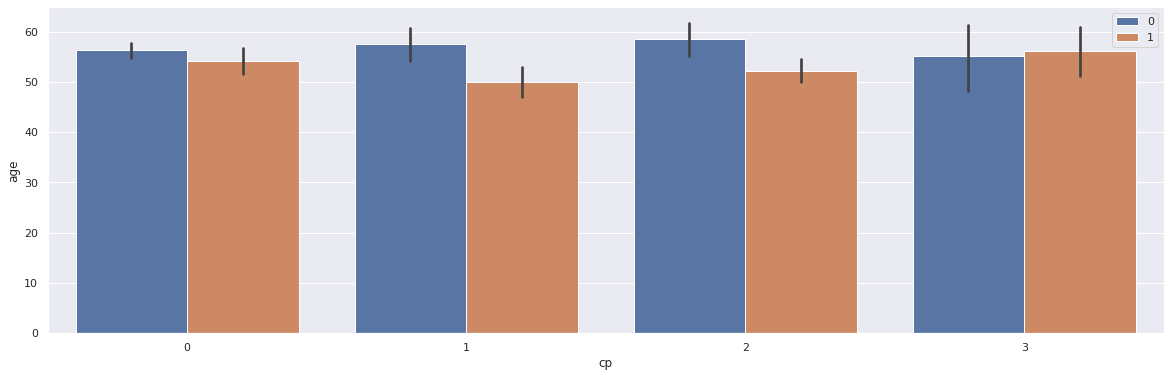

In [16]:
plt.figure(figsize=(20,6))
sns.barplot(x='cp',y='age',data=df,hue='target');
plt.legend(loc='upper right');

In [17]:
px.scatter(data_frame=df,x='age',y='thalach',title='Distribution of Max Heart Rate over Age',color='target')

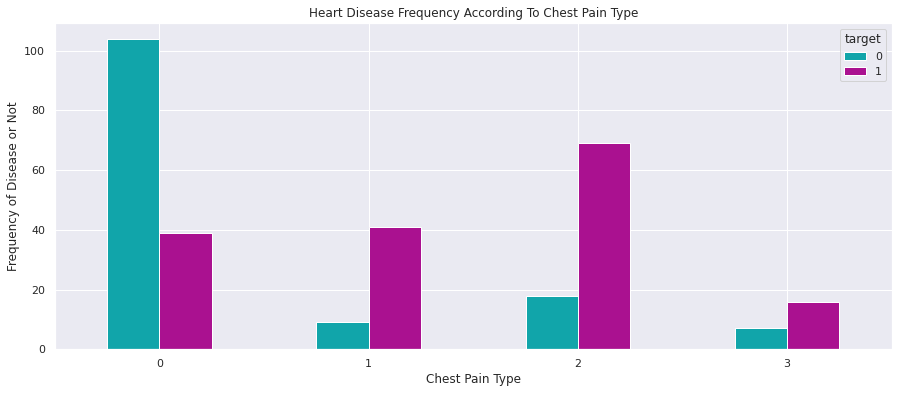

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Patients with chest pain "typical angina" don't suffer from heart disease.
Patients with chest pain "non-anginal pain" are  more prone to heart disease

In [19]:
data = df[['trestbps','chol','thalach']]
px.box(data_frame=data)

In [20]:
px.scatter(data_frame=df,x='age',y='chol')

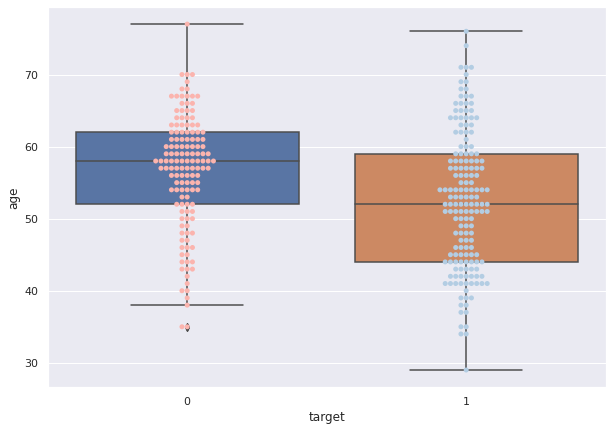

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='target',y='age',data=df)
sns.swarmplot(x='target',y='age',data=df,palette="Pastel1")

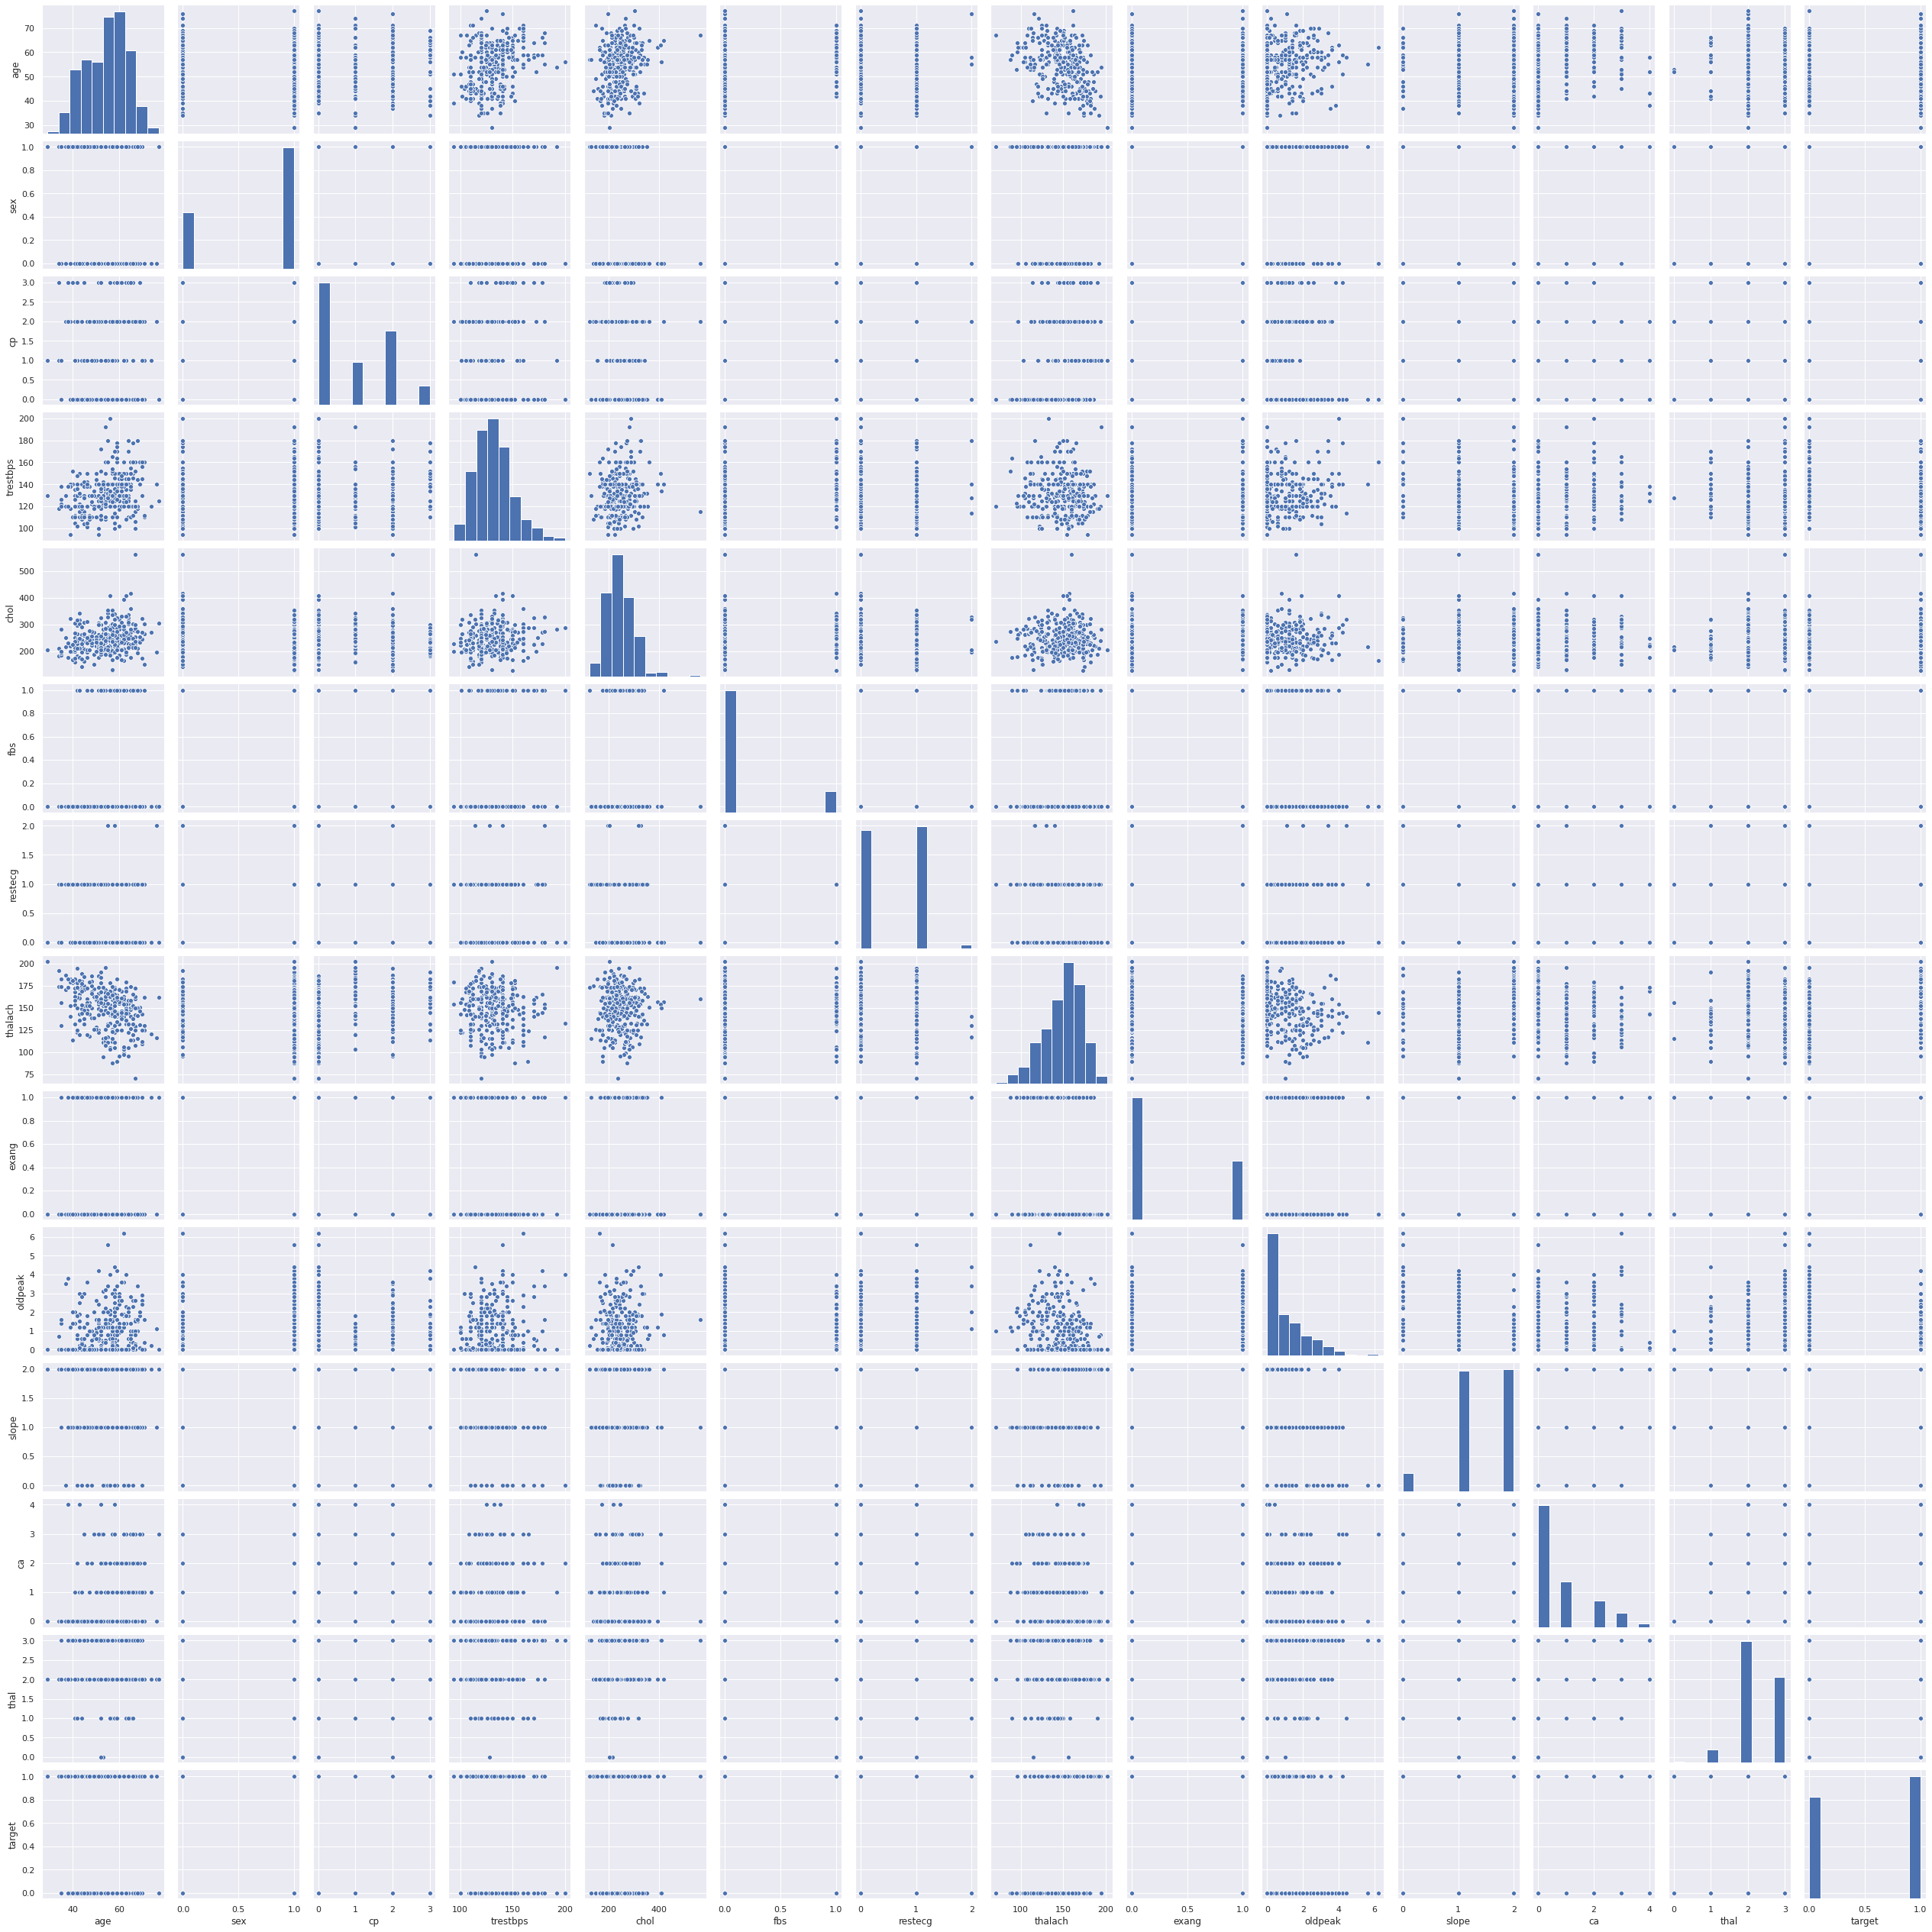

In [22]:
sns.pairplot(data=df)

### Feature Importance

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
X = df.drop('target',axis=1)
Y = df['target']
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[0.06270306 0.03234035 0.18603277 0.04679008 0.04989388 0.01736664
 0.03987913 0.06187392 0.09649731 0.06426945 0.0599106  0.14884668
 0.13359613]


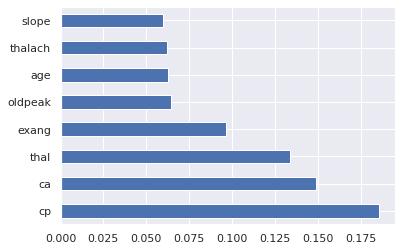

In [24]:
# plot graph of feature importance for better visualization
feat_import = pd.Series(model.feature_importances_,index = X.columns)
feat_import.nlargest(8).plot(kind='barh')
plt.show()

Therefore chest pain(cp) & number of major vessels(ca) are the most important features

## Building a Model

In [25]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)
score = []

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
s1 = np.mean(cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=10))
score.append(s1*100)

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
s2 = np.mean(cross_val_score(dt,X_train,y_train,scoring='accuracy',cv=10))
score.append(s2*100)

In [30]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)
s3 = np.mean(cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=10))
score.append(s3*100)

In [31]:
svc = SVC()
svc.fit(X_train,y_train)
s4 = np.mean(cross_val_score(svc,X_train,y_train,scoring='accuracy',cv=10))
score.append(s4*100)

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
s5 = np.mean(cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10))
score.append(s5*100)

In [33]:
nb = GaussianNB()
nb.fit(X_train,y_train)
s6 = np.mean(cross_val_score(nb,X_train,y_train,scoring='accuracy',cv=10))
score.append(s6*100)

In [34]:
models = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','KNeighborsClassifier','GaussianNB']
for i in range(len(models)):
    print('The Accuracy Score for',models[i],'is',score[i])

The Accuracy Score for LogisticRegression is 81.43333333333335
The Accuracy Score for DecisionTreeClassifier is 72.71666666666667
The Accuracy Score for RandomForestClassifier is 83.06666666666666
The Accuracy Score for SVC is 61.95
The Accuracy Score for KNeighborsClassifier is 63.23333333333333
The Accuracy Score for GaussianNB is 79.35


**According to above results we can choose Logistic regression or Random Forest Classifier**

**Lets Perform Hyper Parameter Tuning to increase Accuracy**

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
parameters = {
    'n_estimators':range(10,500,10),
    'criterion': ('gini','entropy'),
    'max_features':('auto','sqrt','log2'),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap': [True,False]
}
grid = RandomizedSearchCV(rf,param_distributions=parameters,scoring='accuracy',cv=5,verbose=0,n_iter=50,random_state=42,n_jobs=1)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=300),
                   n_iter=50, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ('gini', 'entropy'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': range(10, 500, 10)},
                   random_state=42, scoring='accuracy')

In [37]:
grid.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'criterion': 'gini',
 'bootstrap': True}

In [38]:
grid.best_score_

0.8387755102040815

## Building an Artificial Neural Networks(ANN)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [40]:
model = Sequential()
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=13))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [42]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=10)

Epoch 1/300
25/25 [==============================] - 0s 13ms/step - loss: 0.7714 - accuracy: 0.5165 - val_loss: 0.6029 - val_accuracy: 0.7049
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.5868 - val_loss: 0.7368 - val_accuracy: 0.5410
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5579 - val_loss: 0.5656 - val_accuracy: 0.6885
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.6322 - val_loss: 0.5021 - val_accuracy: 0.8033
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 0.5850 - accuracy: 0.6901 - val_loss: 0.5927 - val_accuracy: 0.6230
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.6281 - val_loss: 0.5097 - val_accuracy: 0.8525
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.6281 - val_loss: 0.4965 - val_accuracy: 0.8033
Epoch 8/300


Epoch 59/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3779 - accuracy: 0.8264 - val_loss: 0.3724 - val_accuracy: 0.8689
Epoch 60/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.8182 - val_loss: 0.4131 - val_accuracy: 0.8361
Epoch 61/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.8512 - val_loss: 0.3488 - val_accuracy: 0.8852
Epoch 62/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3933 - accuracy: 0.8058 - val_loss: 0.3439 - val_accuracy: 0.8689
Epoch 63/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3678 - accuracy: 0.8512 - val_loss: 0.4325 - val_accuracy: 0.8361
Epoch 64/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.8264 - val_loss: 0.3734 - val_accuracy: 0.8525
Epoch 65/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.8388 - val_loss: 0.3969 - val_accuracy: 0.8689
Epoch 

25/25 [==============================] - 0s 5ms/step - loss: 0.3670 - accuracy: 0.8388 - val_loss: 0.3549 - val_accuracy: 0.8689
Epoch 117/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3502 - accuracy: 0.8471 - val_loss: 0.3761 - val_accuracy: 0.8689
Epoch 118/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3840 - accuracy: 0.8471 - val_loss: 0.3367 - val_accuracy: 0.8852
Epoch 119/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3595 - accuracy: 0.8347 - val_loss: 0.3526 - val_accuracy: 0.8689
Epoch 120/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.8388 - val_loss: 0.4137 - val_accuracy: 0.8197
Epoch 121/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3526 - accuracy: 0.8512 - val_loss: 0.3418 - val_accuracy: 0.8852
Epoch 122/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3686 - accuracy: 0.8430 - val_loss: 0.3471 - val_accuracy: 0.8852
Epoch 123/300

25/25 [==============================] - 0s 5ms/step - loss: 0.3835 - accuracy: 0.8306 - val_loss: 0.3446 - val_accuracy: 0.8852
Epoch 174/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3991 - accuracy: 0.8388 - val_loss: 0.3546 - val_accuracy: 0.8689
Epoch 175/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3554 - accuracy: 0.8430 - val_loss: 0.3682 - val_accuracy: 0.8852
Epoch 176/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8140 - val_loss: 0.4520 - val_accuracy: 0.8197
Epoch 177/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.8512 - val_loss: 0.5100 - val_accuracy: 0.8197
Epoch 178/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8223 - val_loss: 0.3780 - val_accuracy: 0.8689
Epoch 179/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8058 - val_loss: 0.3601 - val_accuracy: 0.8689
Epoch 180/300

25/25 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.8678 - val_loss: 0.6887 - val_accuracy: 0.7705
Epoch 231/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.8595 - val_loss: 0.3511 - val_accuracy: 0.8689
Epoch 232/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8430 - val_loss: 0.3476 - val_accuracy: 0.8852
Epoch 233/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3416 - accuracy: 0.8430 - val_loss: 0.4101 - val_accuracy: 0.8689
Epoch 234/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.8595 - val_loss: 0.5781 - val_accuracy: 0.8033
Epoch 235/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8512 - val_loss: 0.4319 - val_accuracy: 0.8361
Epoch 236/300
25/25 [==============================] - 0s 4ms/step - loss: 0.4246 - accuracy: 0.8223 - val_loss: 0.3639 - val_accuracy: 0.8689
Epoch 237/300

25/25 [==============================] - 0s 6ms/step - loss: 0.3290 - accuracy: 0.8554 - val_loss: 0.5160 - val_accuracy: 0.8525
Epoch 288/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3277 - accuracy: 0.8512 - val_loss: 0.3943 - val_accuracy: 0.8689
Epoch 289/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.8678 - val_loss: 0.5597 - val_accuracy: 0.8525
Epoch 290/300
25/25 [==============================] - 0s 6ms/step - loss: 0.3033 - accuracy: 0.8595 - val_loss: 0.6686 - val_accuracy: 0.8033
Epoch 291/300
25/25 [==============================] - 0s 8ms/step - loss: 0.3786 - accuracy: 0.8471 - val_loss: 0.3894 - val_accuracy: 0.8197
Epoch 292/300
25/25 [==============================] - 0s 6ms/step - loss: 0.3545 - accuracy: 0.8595 - val_loss: 0.3599 - val_accuracy: 0.8525
Epoch 293/300
25/25 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.8554 - val_loss: 0.3529 - val_accuracy: 0.8525
Epoch 294/300

In [43]:
metrics = pd.DataFrame(model.history.history)

In [44]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8852


[0.36341649293899536, 0.8852459192276001]

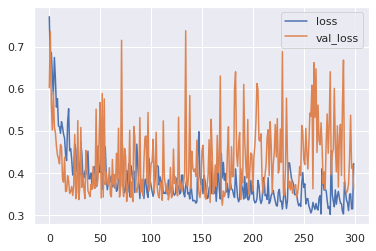

In [45]:
metrics[['loss','val_loss']].plot()

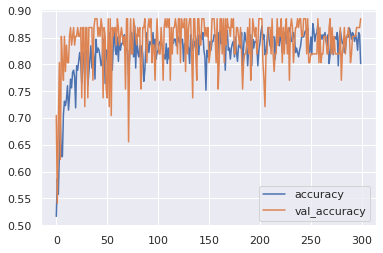

In [46]:
metrics[['accuracy','val_accuracy']].plot()

### Predicting the Test set results

In [47]:
pred = model.predict_classes(X_test)
pred

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,pred)

In [49]:
cm

array([[25,  4],
       [ 3, 29]])

In [50]:
accuracy_score(y_test,pred)

0.8852459016393442

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

